### Cuestiones
1. Elige un conjunto de datos para clasificación binaria. (Es decir, debe incluir etiquetas binarias.)
2. Visualiza (algunos de) los datos.
3. Separa los datos en un conjunto de training y otro de test.
4. Entrena una SVM sobre los datos de training. Busca los parámetros óptimos usando GridSearchCV.
5. Prueba el clasificador sobre los datos de test y reporta el resultado.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time


### 1) Descripción del dataset


Consideramos el dataset Carseats del paquete ISLR de R usado durante el curso. Este dataset almacena 400 observaciones de 11 variables relacionadas con la venta de sillitas de coche para niños en diferentes tiendas. Se miden características tanto de la población que compra en cada tienda, como de la comercialización de las sillas: Sales (número de ventas en miles), Comprice(precio del competidor), Income (salario medio en miles de dólares), Advertising (presupuesto para publicidad en miles de dólares), Population (población en miles de personas), Price (precio), ShelveLoc (eficacia de la colocación del producto en la tienda), Age (edad media de la población), Education (años de educación recibidos), Urban (carácter urbano de la población), US (indica si la tienda esta en Estados Unidos o no).

El problema que se plantea es el de determinar si una tienda dada ofrece sillitas caras (por encima de la media), o baratas (por debajo), en función del resto de variables, para lo que hemos discretizado la variable Price estableciendo como umbral su valor medio.

In [2]:
df = pd.read_csv('Carseats.csv')

In [3]:
df.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


Además, hemos descartado tres campos, de tipo factor, para poder usar el SVM sin problemas.

In [4]:
y = df['Price']
y = np.where(y > round(np.mean(y)), 1, 0) 
X = df.drop(['Price','ShelveLoc','Urban','US'],axis=1)

### 2) Visualización del dataset

In [49]:
X.head(3)

,Sales,CompPrice,Income,Advertising,Population,Age,Education
0,9.50,138,73,11,276,42,17
1,11.22,111,48,16,260,65,10
2,10.06,113,35,10,269,59,12


Representamos un histograma para cada variable para tener una idea de sus distribuciones.

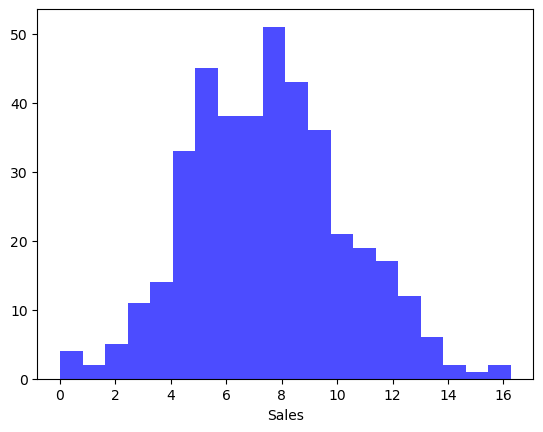

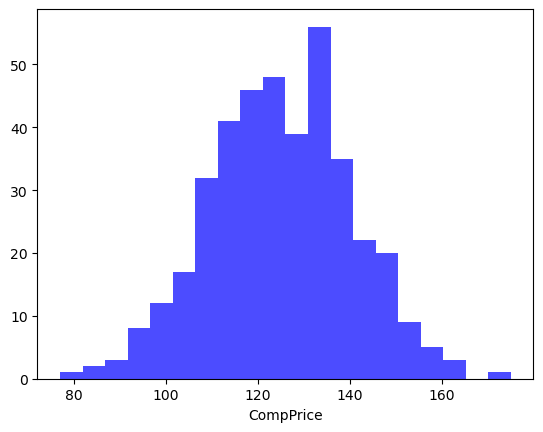

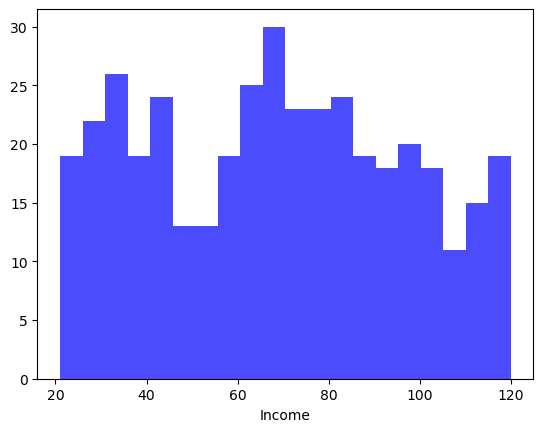

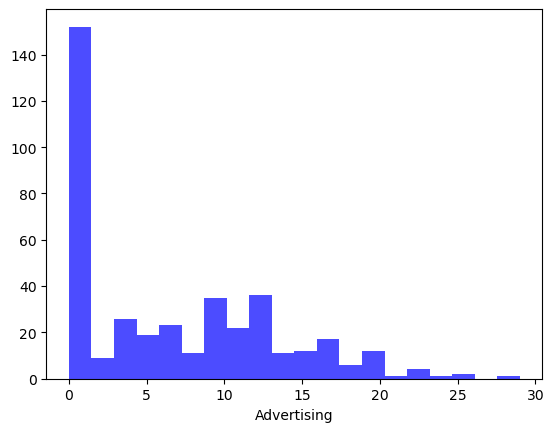

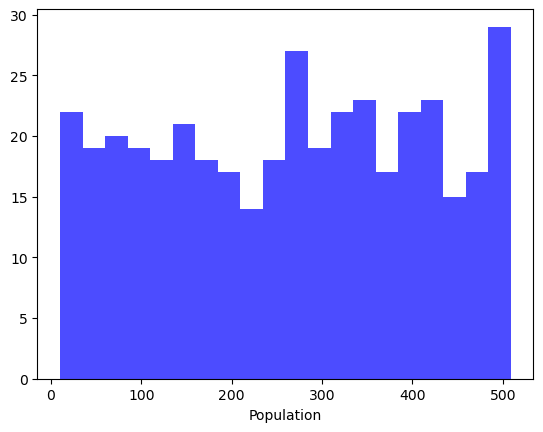

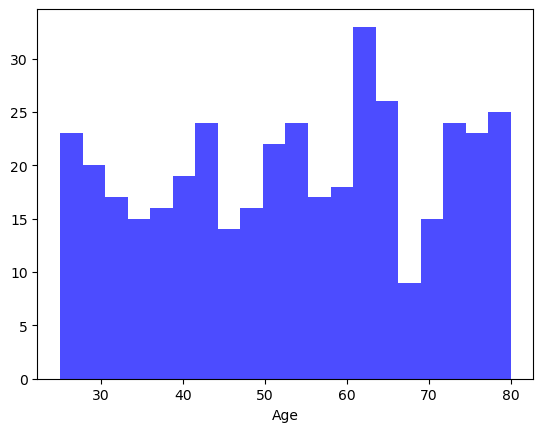

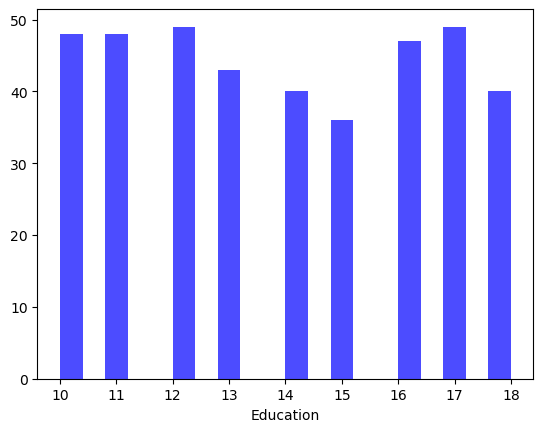

In [56]:
for col in X.columns:
    plt.hist(X[col], bins=20, color='blue', alpha=0.7)
    plt.xlabel(col)
    #plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0)) 
    #plt.ylabel('Frecuencia')
    plt.show()

Comentarios: respecto a las distribuciones de los datos, el nivel educativo, la edad, la población, y el salario medio siguen aproximadamente una distribución uniforme. Por otro lado, el número de ventas y el precio de la competencia siguen distribuciones normales. Por último, el presupuesto de publicidad más frecuente ronda los mil dólares, y disminuye rápidamente la frecuencia a medida que aumenta el presupuesto.

### 3) Separación en train y test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

### 4) Entrenamiento del SVM

In [29]:
param_grid = {'C': [0.1, 1, 10, 100,1e4,1e8],
              'gamma': [10,1,0.01,0.001,1e-6,1e-9]}

In [30]:
clf = SVC(kernel='rbf', class_weight='balanced') 

In [34]:
np.random.seed(0)
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
best_score = grid.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10000.0, 'gamma': 1e-06}
Best Score: 0.7966666666666666


Los valores de los hiperparámetros óptimos que se obtienen con GridSearchCV para una cross-validación 5-fold son: C=1e4 y gamma = 1e-6.

### 5) Test

In [46]:
clf_opt = grid.best_estimator_
y_pred = clf_opt.predict(X_test)

In [47]:
conf_m = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_m)

Confusion Matrix:
[[32 14]
 [14 40]]


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        46
           1       0.74      0.74      0.74        54

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



Comentarios: se obtienen buenos valores  del recall y la precision para ambos grupos de tiendas. Respecto al primer parámetro, esto quiere decir que el modelo clasifica bien una proporción alta de las instancias de ambas clases de tiendas. El segundo parámetro, por otro lado, expresa que, dada una predicción, la probabilidad de que sea correcta es relativamente alta para ambas clases. Por tanto, el modelo es capaz de clasificar bien tiendas de ambas clases.

Teniendo en cuenta las clasificaciones sobre los dos grupos de tiendas, se obtiene una tasa global de acierto del 72 %. que es valor relativamente bueno.